# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy
from citipy import citipy

ModuleNotFoundError: No module named 'citipy'

In [ ]:
import json
%matplotlib inline

In [2]:
# Output File (CSV)
output_data_file = "https://openweathermap.org/api"
#read = pd.read_csv(output_data_file)
print(requests.get(output_data_file))

<Response [200]>


## Generate Cities List

In [4]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

NameError: name 'citipy' is not defined

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
url = "https://openweathermap.org/api"
#response = requests.get(f"{query}{cities[x]},{country[x].upper()}").json()
units ="imperial"    


citys = []
country =[]
latitude = []
longitude = []
temperature = []
humidity = []
clouds = []
wind = []
x=1
for city in cities:
    
   
    name = city.citys
    print("Retreiving data for City #"+ str(x) + " of " + str((len(cities))) + " ... "  + name )
    
    query = url + "appid=" + api_key + "&q=" + name + "&units=" + units
    print(query)
    print(30 * "-")
    
    # Get weather data
    weather = requests.get(query)
    weather_json = weather.json()
    
   
    
    try:
   
        
        citys.append(weather_json['name'])
        country.append(weather_json['sys']['country'])
        latitude.append(weather_json['coord']['lat'])
        longitude.append(weather_json['coord']['lon'])
        tempersature.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        wind.append(weather_json['wind']['speed'])
        
        x = x + 1
            
    except:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind.append(np.nan)
        clouds.append(np.nan)
    
        
    
print(f"Processing record {x + 1} | {cities[x]}")
print(f"{query}{cities[x]},{country[x].upper()}")




IndexError: list index out of range

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
city_data_df = pd.DataFrame({'City': city,
                            'Latitude': latitude,
                            'Longitude': longitude,
                            'Temperature': temperature,
                            'Humidity': humidity,
                            'Cloudiness': clouds,
                            'Wind Speed': wind})

#Save dataframe as csv
pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

city_data_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

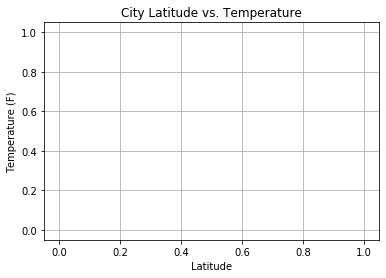

In [50]:
plt.scatter(city_data_df['Latitude'], city_data_df['Temperature'])
plt.title(f'City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig('lat_temp.png', bbox_inches='tight')

#### Latitude vs. Humidity Plot

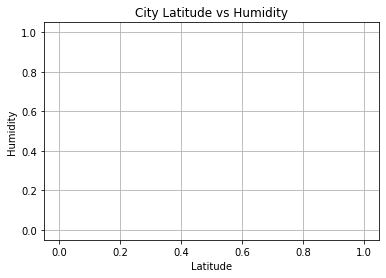

In [51]:
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'])
plt.title(f'City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)
plt.savefig('lat_humid.png', bbox_inches='tight')

#### Latitude vs. Cloudiness Plot

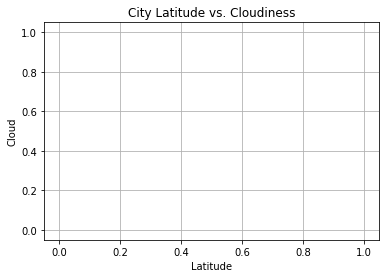

In [53]:
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'])
plt.title(f'City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloud')
plt.grid(True)
plt.savefig('lat_cloud.png', bbox_inches='tight')

#### Latitude vs. Wind Speed Plot

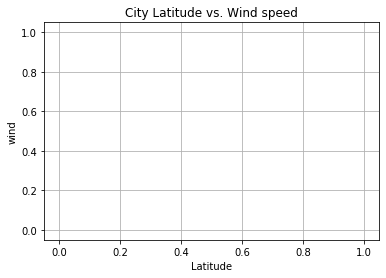

In [56]:
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'])
plt.title(f'City Latitude vs. Wind speed')
plt.xlabel('Latitude')
plt.ylabel('wind')
plt.grid(True)
plt.savefig('lat_wind.png', bbox_inches='tight')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression